# 📌 Extracão

In [79]:
import pandas as pd

In [80]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [81]:
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformação

In [82]:
dados.size

43602

In [83]:
dados.shape

(7267, 6)

In [84]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [85]:
print(dados['customer'][0])
print(dados['phone'][0])
print(dados['internet'][0])
print(dados['account'][0])

{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
{'PhoneService': 'Yes', 'MultipleLines': 'No'}
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


### Estruturando os dados

In [86]:
customer_df = pd.json_normalize(dados['customer'])
dados = pd.merge(dados, customer_df, left_index=True, right_index=True)

phone_df = pd.json_normalize(dados['phone'])
dados = pd.merge(dados, phone_df, left_index=True, right_index=True)

internet_df = pd.json_normalize(dados['internet'])
dados = pd.merge(dados, internet_df, left_index=True, right_index=True)

account_df = pd.json_normalize(dados['account'])
dados = pd.merge(dados, account_df, left_index=True, right_index=True)

display(dados.head())

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [87]:
dados.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)
display(dados.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [88]:
print(dados['Charges.Monthly'].dtype)
print(dados['Charges.Total'].dtype)
print(dados[dados['Charges.Total'] == ' '].shape)
print(dados[dados['Charges.Monthly'] == ' '].shape)

float64
object
(11, 21)
(0, 21)


In [89]:
dados['Charges.Total'] = pd.to_numeric(dados['Charges.Total'], errors='coerce')
dados.dropna(subset=['Charges.Total', 'Charges.Monthly'], inplace=True)

scaler = MinMaxScaler()
columns_to_normalize = ['Charges.Monthly', 'Charges.Total']
dados[columns_to_normalize] = scaler.fit_transform(dados[columns_to_normalize])
display(dados.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,0.471144,0.066294
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,0.414428,0.060420
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.553731,0.030239
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.793532,0.140670
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.653234,0.028687


### Identificando e Tratando Inconsistências nos dados

In [90]:
print("Valores ausentes por coluna:")
print(dados.isnull().sum())

print("\nNúmero de linhas duplicadas:")
print(dados.duplicated().sum())

Valores ausentes por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de linhas duplicadas:
0


In [91]:
for col in dados.select_dtypes(include='object').columns:
    print(f"\nValores únicos na coluna '{col}':")
    print(dados[col].unique())

print("\nTipos de dados das colunas:")
print(dados.dtypes)

dados = dados[dados['Churn'] != '']
print("\nValores únicos na coluna 'Churn' após tratamento:")
print(dados['Churn'].unique())


Valores únicos na coluna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos na coluna 'Churn':
['No' 'Yes' '']

Valores únicos na coluna 'gender':
['Female' 'Male']

Valores únicos na coluna 'Partner':
['Yes' 'No']

Valores únicos na coluna 'Dependents':
['Yes' 'No']

Valores únicos na coluna 'PhoneService':
['Yes' 'No']

Valores únicos na coluna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos na coluna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos na coluna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos na coluna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos na coluna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos na coluna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores únicos na coluna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores únicos na coluna 'StreamingMovies':
['No' 'Yes' 'No internet servic

### Criando Nova Coluna

In [92]:
dados['Contas_Diarias'] = dados['Charges.Monthly'] / 30.44

display(dados.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.471144,0.066294,0.015478
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.414428,0.060420,0.013615
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.553731,0.030239,0.018191
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.793532,0.140670,0.026069
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.653234,0.028687,0.021460


### Transformando dados para possível processamento matemático e análises

In [93]:
binary_columns = []
specific_categorical_columns = {}

expected_binary_values = [{'Yes', 'No'}, {'Male', 'Female'}]
expected_phone_service_values = {'Yes', 'No', 'No phone service'}
expected_internet_service_values = {'DSL', 'Fiber optic', 'No'}
expected_internet_related_values = {'No internet service', 'Yes', 'No'}
expected_contract_values = {'One year', 'Month-to-month', 'Two year'}
expected_payment_values = {'Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)'}


for col in dados.select_dtypes(include='object').columns:
    unique_values = set(dados[col].unique())
    if unique_values in expected_binary_values:
        binary_columns.append(col)
    elif unique_values == expected_phone_service_values:
        specific_categorical_columns[col] = 'phone_service'
    elif unique_values == expected_internet_service_values:
        specific_categorical_columns[col] = 'internet_service'
    elif unique_values == expected_internet_related_values:
        specific_categorical_columns[col] = 'internet_related'
    elif unique_values == expected_contract_values:
        specific_categorical_columns[col] = 'contract'
    elif unique_values == expected_payment_values:
        specific_categorical_columns[col] = 'payment_method'

print("Colunas identificadas como binárias:", binary_columns)
print("Colunas com valores categóricos específicos:", specific_categorical_columns)

Colunas identificadas como binárias: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Colunas com valores categóricos específicos: {'MultipleLines': 'phone_service', 'InternetService': 'internet_service', 'OnlineSecurity': 'internet_related', 'OnlineBackup': 'internet_related', 'DeviceProtection': 'internet_related', 'TechSupport': 'internet_related', 'StreamingTV': 'internet_related', 'StreamingMovies': 'internet_related', 'Contract': 'contract', 'PaymentMethod': 'payment_method'}


In [94]:
binary_mapping = {'Yes': 1, 'No': 0}
gender_mapping = {'Male': 1, 'Female': 0}

print("Binary mapping:", binary_mapping)
print("Gender mapping:", gender_mapping)

Binary mapping: {'Yes': 1, 'No': 0}
Gender mapping: {'Male': 1, 'Female': 0}


In [95]:
for col in binary_columns:
    if col == 'gender':
        dados[col] = dados[col].map(gender_mapping)
    else:
        dados[col] = dados[col].map(binary_mapping)

display(dados.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,0.471144,0.066294,0.015478
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,0.414428,0.060420,0.013615
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,0.553731,0.030239,0.018191
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,0.793532,0.140670,0.026069
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,0.653234,0.028687,0.021460


In [96]:
column_rename_mapping = {
    'SeniorCitizen': 'IsSeniorCitizen',
    'Partner': 'HasPartner',
    'Dependents': 'HasDependents',
    'tenure': 'TenureMonths',
    'PhoneService': 'HasPhoneService',
    'MultipleLines': 'MultipleLinesStatus',
    'InternetService': 'InternetServiceType',
    'OnlineSecurity': 'OnlineSecurityStatus',
    'OnlineBackup': 'OnlineBackupStatus',
    'DeviceProtection': 'DeviceProtectionStatus',
    'TechSupport': 'TechSupportStatus',
    'StreamingTV': 'StreamingTVStatus',
    'StreamingMovies': 'StreamingMoviesStatus',
    'Contract': 'ContractType',
    'PaperlessBilling': 'IsPaperlessBilling',
    'PaymentMethod': 'PaymentMethodType',
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}

print(column_rename_mapping)

{'SeniorCitizen': 'IsSeniorCitizen', 'Partner': 'HasPartner', 'Dependents': 'HasDependents', 'tenure': 'TenureMonths', 'PhoneService': 'HasPhoneService', 'MultipleLines': 'MultipleLinesStatus', 'InternetService': 'InternetServiceType', 'OnlineSecurity': 'OnlineSecurityStatus', 'OnlineBackup': 'OnlineBackupStatus', 'DeviceProtection': 'DeviceProtectionStatus', 'TechSupport': 'TechSupportStatus', 'StreamingTV': 'StreamingTVStatus', 'StreamingMovies': 'StreamingMoviesStatus', 'Contract': 'ContractType', 'PaperlessBilling': 'IsPaperlessBilling', 'PaymentMethod': 'PaymentMethodType', 'Charges.Monthly': 'MonthlyCharges', 'Charges.Total': 'TotalCharges', 'Contas_Diarias': 'DailyCharges'}


In [97]:
dados.rename(columns=column_rename_mapping, inplace=True)
display(dados.head())

,customerID,Churn,gender,IsSeniorCitizen,HasPartner,HasDependents,TenureMonths,HasPhoneService,MultipleLinesStatus,InternetServiceType,...,DeviceProtectionStatus,TechSupportStatus,StreamingTVStatus,StreamingMoviesStatus,ContractType,IsPaperlessBilling,PaymentMethodType,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,0.471144,0.066294,0.015478
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,0.414428,0.060420,0.013615
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,0.553731,0.030239,0.018191
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,0.793532,0.140670,0.026069
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,0.653234,0.028687,0.021460


In [98]:
categorical_value_mapping = {
    'MultipleLinesStatus': {'No phone service': 'No'},
    'InternetServiceType': {'No': 'No internet service'},
    'OnlineSecurityStatus': {'No internet service': 'No'},
    'OnlineBackupStatus': {'No internet service': 'No'},
    'DeviceProtectionStatus': {'No internet service': 'No'},
    'TechSupportStatus': {'No internet service': 'No'},
    'StreamingTVStatus': {'No internet service': 'No'},
    'StreamingMoviesStatus': {'No internet service': 'No'}
}

print(categorical_value_mapping)

{'MultipleLinesStatus': {'No phone service': 'No'}, 'InternetServiceType': {'No': 'No internet service'}, 'OnlineSecurityStatus': {'No internet service': 'No'}, 'OnlineBackupStatus': {'No internet service': 'No'}, 'DeviceProtectionStatus': {'No internet service': 'No'}, 'TechSupportStatus': {'No internet service': 'No'}, 'StreamingTVStatus': {'No internet service': 'No'}, 'StreamingMoviesStatus': {'No internet service': 'No'}}


In [99]:
for col, mapping in categorical_value_mapping.items():
    dados[col] = dados[col].replace(mapping)

display(dados.head())

,customerID,Churn,gender,IsSeniorCitizen,HasPartner,HasDependents,TenureMonths,HasPhoneService,MultipleLinesStatus,InternetServiceType,...,DeviceProtectionStatus,TechSupportStatus,StreamingTVStatus,StreamingMoviesStatus,ContractType,IsPaperlessBilling,PaymentMethodType,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,0.471144,0.066294,0.015478
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,0.414428,0.060420,0.013615
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,0.553731,0.030239,0.018191
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,0.793532,0.140670,0.026069
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,0.653234,0.028687,0.021460


In [100]:
display(dados.head())
print("\nTipos de dados das colunas:")
print(dados.dtypes)

,customerID,Churn,gender,IsSeniorCitizen,HasPartner,HasDependents,TenureMonths,HasPhoneService,MultipleLinesStatus,InternetServiceType,...,DeviceProtectionStatus,TechSupportStatus,StreamingTVStatus,StreamingMoviesStatus,ContractType,IsPaperlessBilling,PaymentMethodType,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,0.471144,0.066294,0.015478
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,0.414428,0.060420,0.013615
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,0.553731,0.030239,0.018191
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,0.793532,0.140670,0.026069
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,0.653234,0.028687,0.021460



Tipos de dados das colunas:
customerID                 object
Churn                       int64
gender                      int64
IsSeniorCitizen             int64
HasPartner                  int64
HasDependents               int64
TenureMonths                int64
HasPhoneService             int64
MultipleLinesStatus        object
InternetServiceType        object
OnlineSecurityStatus       object
OnlineBackupStatus         object
DeviceProtectionStatus     object
TechSupportStatus          object
StreamingTVStatus          object
StreamingMoviesStatus      object
ContractType               object
IsPaperlessBilling          int64
PaymentMethodType          object
MonthlyCharges            float64
TotalCharges              float64
DailyCharges              float64
dtype: object


# 📊 Carga e análise

## Análise Descritiva dos Dados

### Subtask:
Calcular métricas descritivas (média, mediana, desvio padrão, etc.) para as colunas numéricas e exibir informações gerais sobre o DataFrame.

In [101]:
display(dados.describe())

display(dados.info())

,Churn,gender,IsSeniorCitizen,HasPartner,HasDependents,TenureMonths,HasPhoneService,IsPaperlessBilling,MonthlyCharges,TotalCharges,DailyCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,0.463166,0.261309,0.015216
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,0.299363,0.261571,0.009835
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.172512,0.044155,0.005667
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,0.518408,0.159090,0.017030
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,0.712562,0.435719,0.023409
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,0.032852


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7032 non-null   object 
 1   Churn                   7032 non-null   int64  
 2   gender                  7032 non-null   int64  
 3   IsSeniorCitizen         7032 non-null   int64  
 4   HasPartner              7032 non-null   int64  
 5   HasDependents           7032 non-null   int64  
 6   TenureMonths            7032 non-null   int64  
 7   HasPhoneService         7032 non-null   int64  
 8   MultipleLinesStatus     7032 non-null   object 
 9   InternetServiceType     7032 non-null   object 
 10  OnlineSecurityStatus    7032 non-null   object 
 11  OnlineBackupStatus      7032 non-null   object 
 12  DeviceProtectionStatus  7032 non-null   object 
 13  TechSupportStatus       7032 non-null   object 
 14  StreamingTVStatus       7032 non-null   objec

None

## Análise da Distribuição da Evasão

### Subtask:
Visualizar a proporção da evasão de clientes utilizando um gráfico.

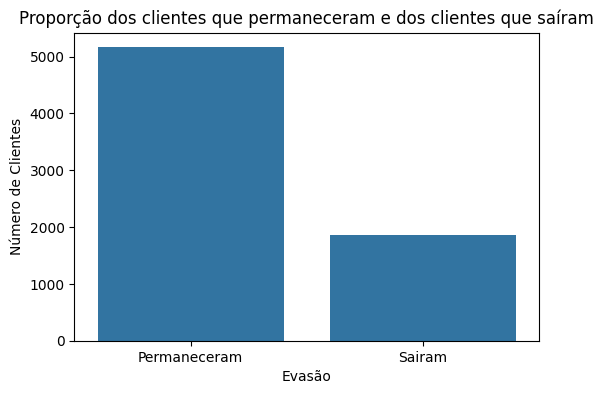

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dados)
plt.title('Proporção dos clientes que permaneceram e dos clientes que saíram')
plt.xlabel('Evasão')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Permaneceram', 'Sairam'])
plt.show()

## Análise da Relação entre Variáveis Categóricas e a Evasão

### Subtask:
Identificar colunas categóricas e visualizar a distribuição das evasões dentro de cada categoria.

In [103]:
categorical_cols = dados.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

print("Colunas categóricas para análise:", categorical_cols)

Colunas categóricas para análise: ['MultipleLinesStatus', 'InternetServiceType', 'OnlineSecurityStatus', 'OnlineBackupStatus', 'DeviceProtectionStatus', 'TechSupportStatus', 'StreamingTVStatus', 'StreamingMoviesStatus', 'ContractType', 'PaymentMethodType']


### Subtask:
Visualizar a distribuição de evasão para cada coluna categórica.

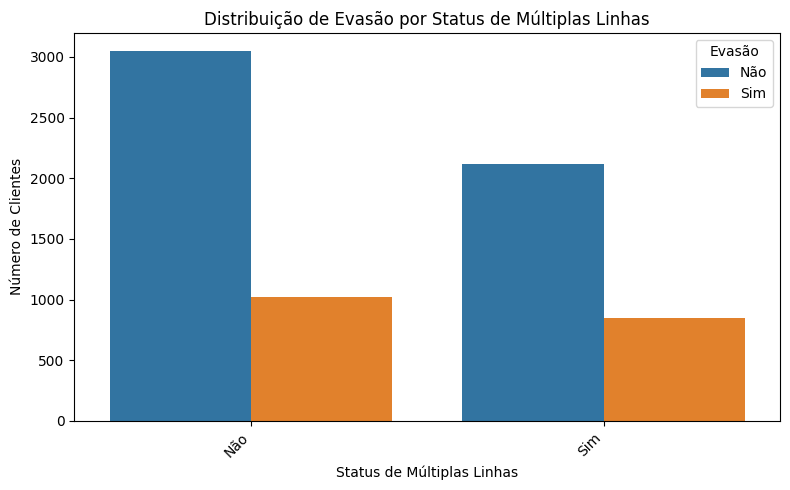

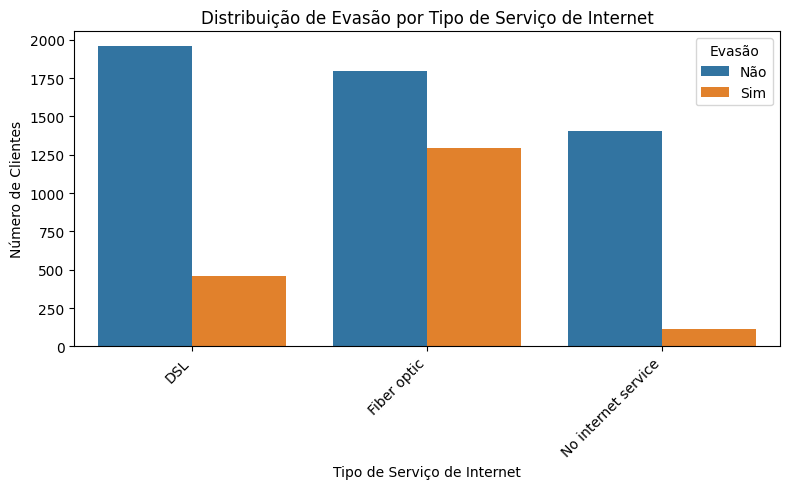

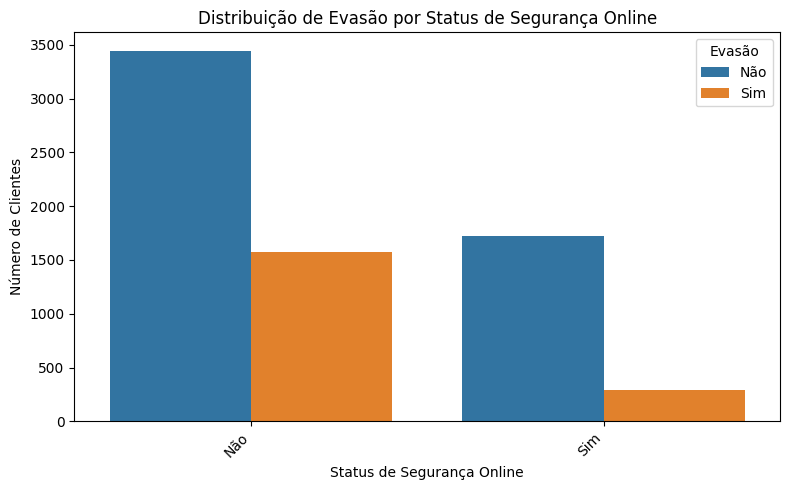

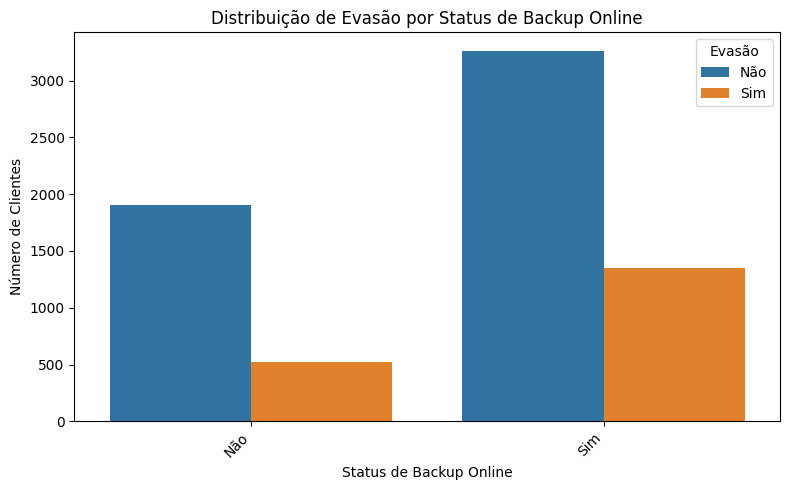

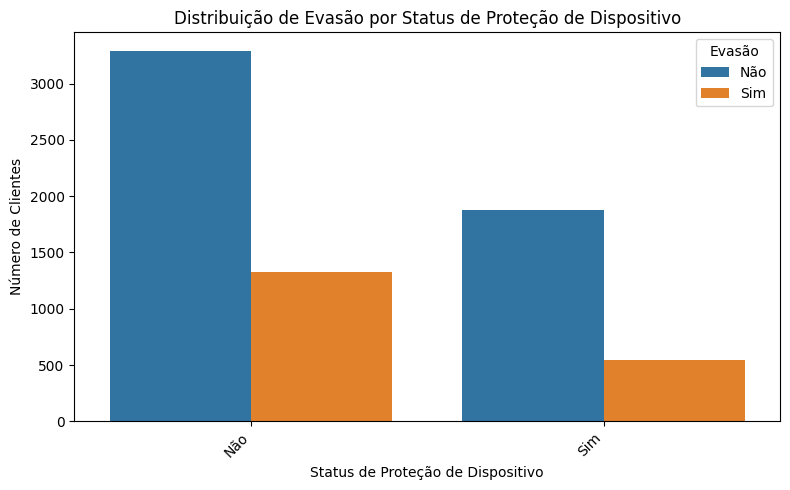

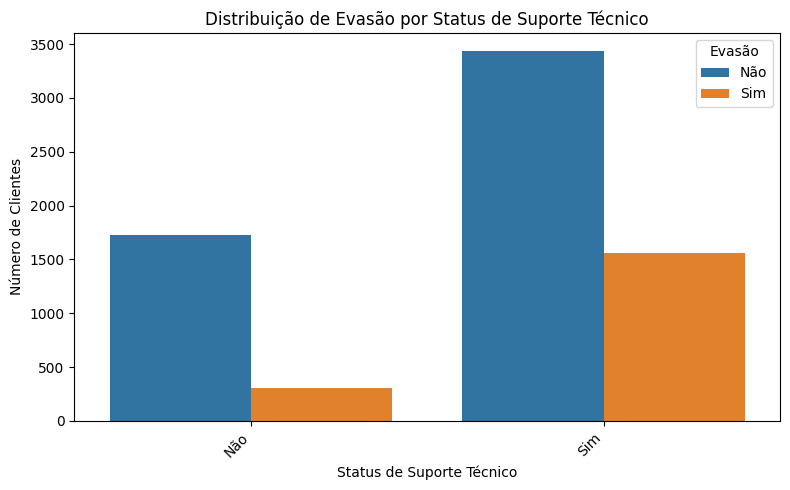

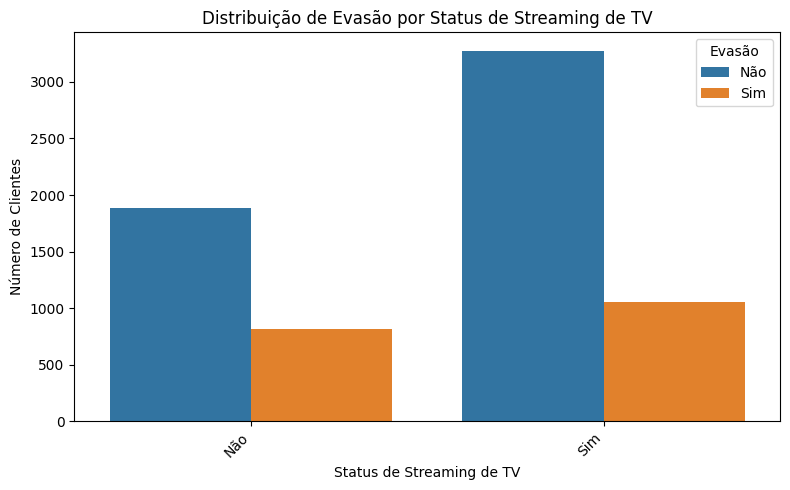

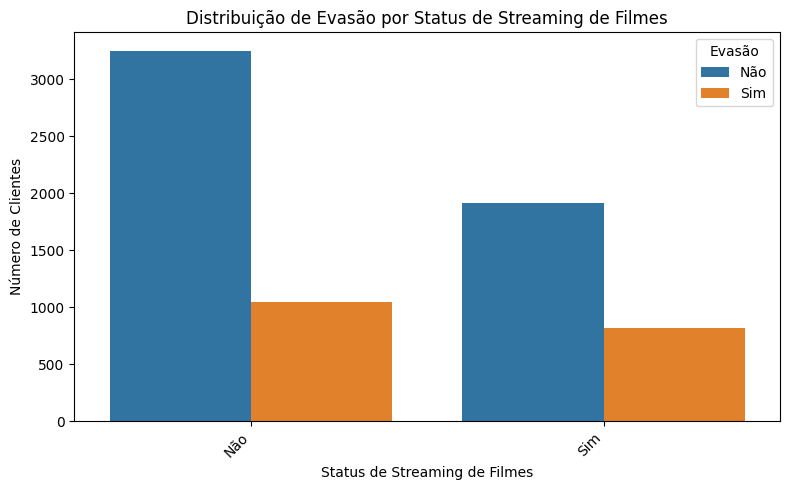

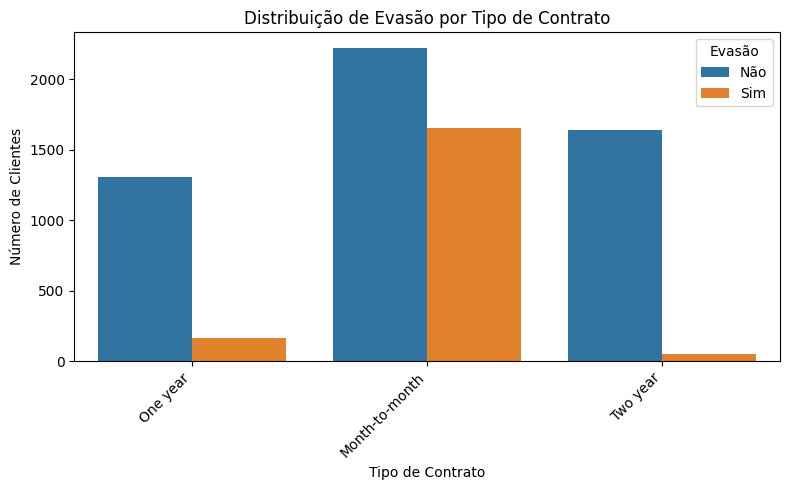

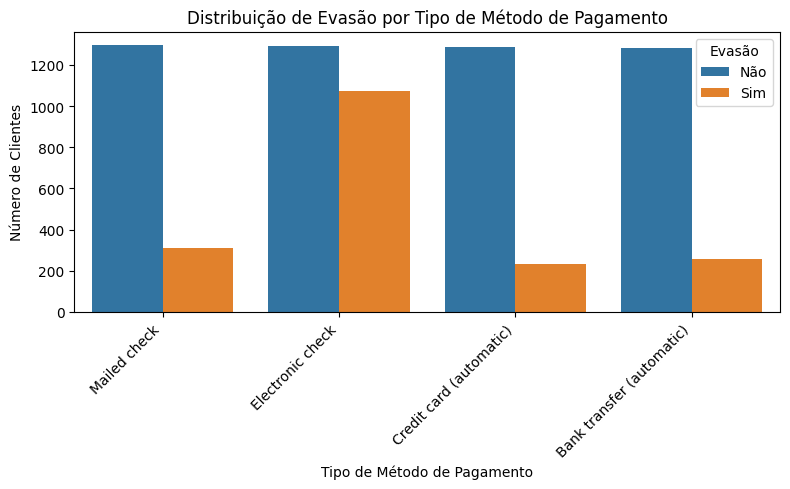

In [104]:
column_translation_mapping = {
    'MultipleLinesStatus': 'Status de Múltiplas Linhas',
    'InternetServiceType': 'Tipo de Serviço de Internet',
    'OnlineSecurityStatus': 'Status de Segurança Online',
    'OnlineBackupStatus': 'Status de Backup Online',
    'DeviceProtectionStatus': 'Status de Proteção de Dispositivo',
    'TechSupportStatus': 'Status de Suporte Técnico',
    'StreamingTVStatus': 'Status de Streaming de TV',
    'StreamingMoviesStatus': 'Status de Streaming de Filmes',
    'ContractType': 'Tipo de Contrato',
    'PaymentMethodType': 'Tipo de Método de Pagamento'
}

churn_hue_mapping = {0: 'Não', 1: 'Sim'}

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=col, hue='Churn', data=dados)

    translated_title = column_translation_mapping.get(col, col)
    plt.title(f'Distribuição de Evasão por {translated_title}')


    translated_xlabel = column_translation_mapping.get(col, col)
    plt.xlabel(translated_xlabel)

    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')


    if col in ['MultipleLinesStatus', 'OnlineSecurityStatus', 'OnlineBackupStatus', 'DeviceProtectionStatus', 'TechSupportStatus', 'StreamingTVStatus', 'StreamingMoviesStatus', 'PaperlessBilling', 'HasPhoneService', 'HasPartner', 'HasDependents']:
        plt.xticks([0, 1], ['Não', 'Sim'], rotation=45, ha='right')
    elif col == 'gender':
         plt.xticks([0, 1], ['Feminino', 'Masculino'], rotation=45, ha='right')


    handles, labels = ax.get_legend_handles_labels()
    sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1]))
    sorted_handles, sorted_labels = zip(*sorted_handles_labels)

    translated_labels = [churn_hue_mapping[int(label)] for label in sorted_labels]

    plt.legend(sorted_handles, translated_labels, title='Evasão')


    plt.tight_layout()
    plt.show()

## Análise da Relação entre Variáveis Numéricas e evasão

### Subtask:
Visualizar a distribuição de variáveis numéricas ('TenureMonths', 'MonthlyCharges', 'TotalCharges', 'DailyCharges') para clientes com e sem Churn.

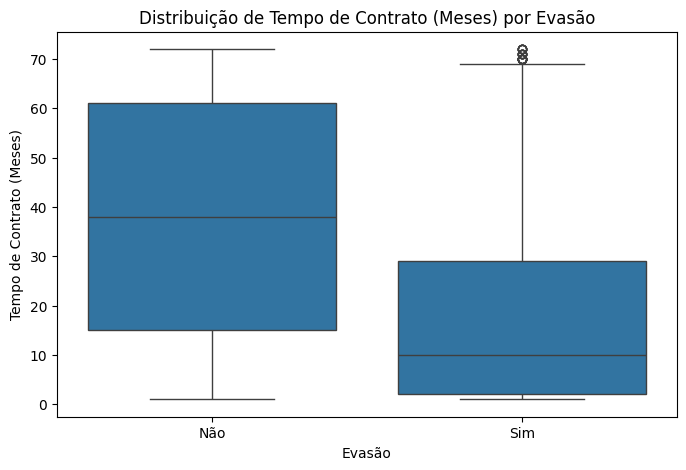

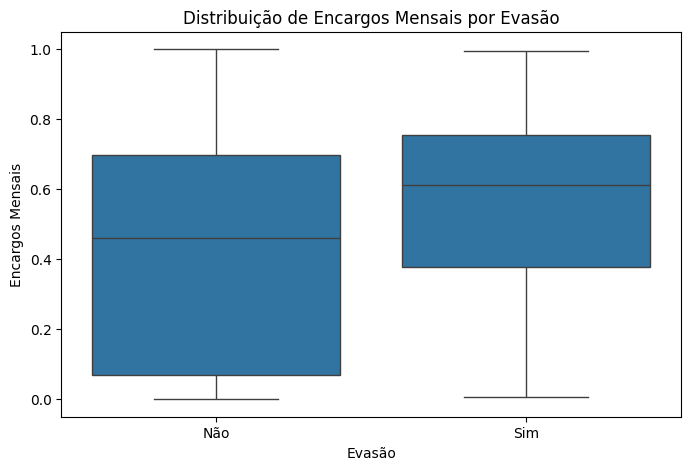

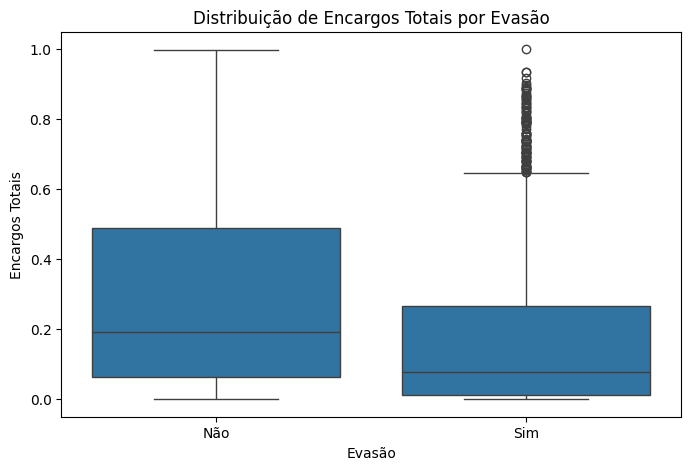

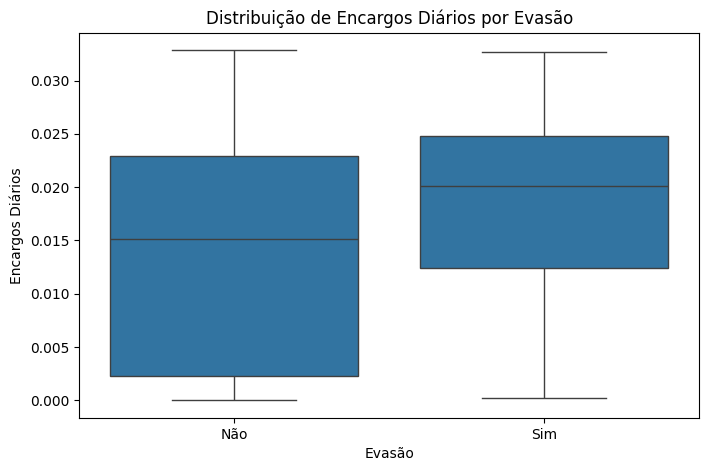

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols_to_analyze = ['TenureMonths', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']

numerical_column_translation_mapping = {
    'TenureMonths': 'Tempo de Contrato (Meses)',
    'MonthlyCharges': 'Encargos Mensais',
    'TotalCharges': 'Encargos Totais',
    'DailyCharges': 'Encargos Diários'
}


for col in numerical_cols_to_analyze:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=dados)


    translated_col_name = numerical_column_translation_mapping.get(col, col)
    plt.title(f'Distribuição de {translated_col_name} por Evasão')
    plt.xlabel('Evasão')
    plt.ylabel(translated_col_name)

    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.show()

# 📊 Relatório de Análise de Evasão de Clientes

## Introdução

Este relatório apresenta uma análise do fenômeno de evasão de clientes em uma empresa de telecomunicações. O objetivo principal é investigar os fatores que contribuem para que os clientes cancelem seus serviços, a fim de identificar padrões e obter insights que possam auxiliar na redução dessa taxa.

A compreensão da evasão é de suma importância para empresas do setor de telecomunicações, pois a aquisição de novos clientes geralmente envolve custos significativamente mais altos do que a retenção dos clientes existentes. Ao identificar os motivos por trás da evasão, a empresa pode desenvolver estratégias mais eficazes para reter seus clientes e, consequentemente, otimizar seus recursos e aumentar a lucratividade.

A análise foi realizada utilizando um conjunto de dados que contém informações sobre o perfil dos clientes, os serviços que eles utilizam, e o histórico de pagamentos.

## Limpeza e Tratamento de Dados

Nesta fase, focamos em preparar o conjunto de dados para análise, garantindo sua qualidade e formato adequados. Os principais passos realizados foram:

*   **Importação dos Dados**: Os dados foram carregados a partir de um arquivo JSON disponibilizado online, utilizando a biblioteca pandas.
*   **Normalização de Dados Aninhados**: As colunas que continham dados aninhados ('customer', 'phone', 'internet', 'account') foram normalizadas utilizando `pd.json_normalize`. Isso extraiu as informações aninhadas em novas colunas no DataFrame principal.
*   **Remoção de Colunas Aninhadas Originais**: As colunas originais com dados aninhados foram removidas após a extração para evitar redundância.
*   **Tratamento de Valores Não Numéricos**: Identificamos que a coluna 'Charges.Total' continha valores não numéricos (' '). Realizamos a conversão dessa coluna para o tipo numérico, tratando os erros como valores ausentes (`errors='coerce'`).
*   **Tratamento de Valores Ausentes**: Removemos as linhas que apresentavam valores ausentes (resultantes do passo anterior) nas colunas 'Charges.Total' e 'Charges.Monthly'.
*   **Verificação de Duplicados**: Checamos a existência de linhas duplicadas no DataFrame, e nenhuma duplicidade foi encontrada.
*   **Tratamento de Inconsistências na Coluna 'Churn'**: Identificamos a presença de valores vazios ('') na coluna 'Churn'. Removemos as linhas correspondentes para garantir que a coluna contivesse apenas 'Yes' ou 'No'.
*   **Criação da Coluna "Contas_Diarias"**: Calculamos o valor diário aproximado do faturamento dividindo a coluna 'Charges.Monthly' pelo número médio de dias em um mês (30.44), criando a nova feature 'Contas_Diarias'.
*   **Conversão de Colunas Binárias**: Identificamos colunas com valores binários (como 'Yes'/'No', 'Male'/'Female') e as convertemos para representação numérica (1 e 0) para facilitar a modelagem.
*   **Renomeação de Colunas**: Renomeamos várias colunas para torná-las mais intuitivas e fáceis de entender.
*   **Padronização de Valores Categóricos**: Padronizamos alguns valores dentro de colunas categóricas para garantir consistência (ex: 'No internet service' e 'No phone service' para 'No' onde apropriado).

Esses passos garantiram que o conjunto de dados estivesse limpo, consistente e pronto para a fase de análise exploratória.

## Análise Exploratória de Dados (AED)

A fase de Análise Exploratória de Dados teve como objetivo entender a distribuição das variáveis e identificar possíveis relações entre elas e a variável de interesse, a evasão.

### Análise Descritiva

Realizamos uma análise descritiva das colunas numéricas para entender suas principais estatísticas (média, mediana, desvio padrão, etc.) e obtivemos informações gerais sobre o DataFrame, incluindo tipos de dados e valores não nulos.

**Resultados:** Consulte a saída da célula `c301c350` para os detalhes da análise descritiva e `dados.info()`.

### Distribuição da Variável Churn

Visualizamos a proporção de clientes que permaneceram e dos que evadiram utilizando um gráfico de contagem.

**Resultados:** Observe o gráfico gerado na célula `10281778` para a distribuição do Churn.

### Relação entre Variáveis Categóricas e Churn

Exploramos como a evasão se distribui entre as diferentes categorias das variáveis categóricas. Criamos gráficos de contagem para cada coluna categórica para visualizar essa relação.

**Resultados:** Veja os gráficos gerados na célula `6713fcc1` que mostram a distribuição de evasão por Status de Múltiplas Linhas, Tipo de Serviço de Internet, Segurança Online, Backup Online, Proteção de Dispositivo, Suporte Técnico, Streaming de TV, Streaming de Filmes, Tipo de Contrato e Tipo de Método de Pagamento.

### Relação entre Variáveis Numéricas e Churn

Analisamos a distribuição de variáveis numéricas como Tempo de Contrato (Meses), Encargos Mensais, Encargos Totais e Encargos Diários para clientes que evadiram e os que não evadiram utilizando box plots.

**Resultados:** Os box plots na célula `a1094af7` ilustram a distribuição dessas variáveis numéricas em relação a evasão dos clientes.

## Conclusões e Insights

Com base na Análise Exploratória de Dados, podemos tirar algumas conclusões e obter insights importantes sobre os fatores que influenciam a evasão de clientes:

*   **Tempo de Contrato (TenureMonths):** Clientes com menor tempo de contrato (TenureMonths) parecem ter uma tendência maior a cancelar o serviço. O box plot da célula `a1094af7` para 'TenureMonths' mostra que a mediana e o terceiro quartil são significativamente menores para clientes que evadiram em comparação com os que permaneceram.
*   **Encargos Mensais (MonthlyCharges):** Clientes com encargos mensais mais altos parecem ter uma maior probabilidade de evasão. O box plot da célula `a1094af7` para 'MonthlyCharges' indica que a distribuição dos encargos mensais é mais alta para o grupo de clientes que evadiram.
*   **Tipo de Contrato (ContractType):** Clientes com contratos mensais ('Month-to-month') apresentam uma taxa de evasão consideravelmente maior em comparação com aqueles com contratos de um ou dois anos. Os gráficos da célula `6713fcc1` para 'ContractType' ilustram claramente essa diferença. Contratos de longo prazo parecem ser um fator importante na retenção de clientes.
*   **Serviço de Internet (InternetServiceType):** Clientes com serviço de internet do tipo 'Fiber optic' parecem ter uma taxa de evasão maior do que aqueles com 'DSL' ou sem serviço de internet. Isso pode indicar problemas de qualidade ou custo associados a esse tipo de serviço. Consulte os gráficos da célula `6713fcc1` para 'InternetServiceType'.
*   **Serviços Adicionais (OnlineSecurityStatus, TechSupportStatus, etc.):** Clientes que não utilizam serviços adicionais como Segurança Online, Backup Online, Proteção de Dispositivo e Suporte Técnico parecem ter uma maior propensão a cancelar. Os gráficos da célula `6713fcc1` para essas colunas ('OnlineSecurityStatus', 'OnlineBackupStatus', 'DeviceProtectionStatus', 'TechSupportStatus') mostram que a proporção de evasão é maior para a categoria 'No'. Isso sugere que esses serviços podem ser importantes para a retenção.
*   **Método de Pagamento (PaymentMethodType):** O método de pagamento 'Electronic check' parece estar associado a uma taxa de evasão mais alta em comparação com outros métodos. Veja os gráficos da célula `6713fcc1` para 'PaymentMethodType'.
*   **Clientes Idosos (IsSeniorCitizen):** Clientes idosos (SeniorCitizen = 1) parecem ter uma taxa de evasão ligeiramente maior, embora a diferença não seja tão pronunciada quanto outros fatores. Consulte os gráficos da célula `6713fcc1` para 'IsSeniorCitizen'.
*   **Parceiros e Dependentes (HasPartner, HasDependents):** Clientes sem parceiros ou dependentes parecem ter uma taxa de evasão um pouco maior. Os gráficos da célula `6713fcc1` para 'HasPartner' e 'HasDependents' mostram essa tendência.

Esses insights sugerem que a duração do contrato, o tipo de serviço de internet, a utilização de serviços de segurança e suporte, o método de pagamento e os encargos mensais são fatores importantes a serem considerados ao analisar e tentar reduzir a evasão de clientes.